In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def rabi_frequency(As, K_, K_p, chi_s, n, chi_c):
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    return nomi/(denomi)

def K(tc, epsion, g, mu, B):
    Ez = g*mu*B
    return np.sqrt(tc**2+epsion**2/4)+ Ez/2, np.sqrt(tc**2+epsion**2/4) - Ez/2

def w0_func(chi_input, tc,n, epsion, g, mu, B):
    K_p, K_ = K(tc, epsion, g, mu, B)
    chi_s, chi_c = Chi(chi_input, tc, epsion)
    gamma_ = K_-K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    return w0

def Chi(chi_input, tc, epsion):
    phi = np.arctan2(2*tc, epsion)
    return np.sin(phi)*chi_input, np.cos(phi)*chi_input

def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B):
    
    phi = np.arctan2(2*tc, epsion)
    K_p, K_ = K(tc, epsion, g, mu, B)
    chi_s, chi_c = Chi(chi_input, tc, epsion)
    As = drive * np.sin(phi)
    print(As)
    
    rabi_0 = rabi_frequency(As, K_, K_p, chi_s, n, chi_c)
    w0 = w0_func(chi_input, tc,n, epsion, g, mu, B)
    print(drive_frequency-w0)
    return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)


def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B):
    
    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input
    
    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi
    
    w0 = w0_func(chi_input, tc,n, epsion, g, mu, B)
    print(drive_frequency-w0)
    return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)

In [194]:
def plot(X, Y, Z,
                 cmap='viridis',
                 levels=15,
                 figsize=(6, 5),
                 xlabel=r'$\epsilon_0\ [\mathrm{\mu eV}]$',
                 ylabel=r'$\omega_d\ [\mathrm{\mu eV}]$',
                 cbar_label=r'$\rho(\epsilon_0, \omega_d)$'):
    """
    Plot a 2D density field Z(X,Y) with a khaki-inspired style:
     - discrete filled contour levels
     - overlaid contour lines
     - figure and axes background set to khaki
     - clean colorbar
    """
    # Set up figure with khaki background
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')
    ax.set_facecolor('white')

    # Determine contour levels
    vmin, vmax = Z.min(), Z.max()
    levels_array = np.linspace(vmin, vmax, levels)

    # Filled contour density plot
    cf = ax.contourf(
        X, Y, Z,
        levels=levels_array,
        cmap=cmap,
        extend='both',
        antialiased=True
    )

    # Overlay contour lines
    cs = ax.contour(
        X, Y, Z,
        levels=levels_array,
        colors='k',
        linewidths=0.5
    )
    ax.clabel(cs, fmt='%.1e', fontsize=8)

    # Axes labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Colorbar with khaki frame
    cbar = fig.colorbar(
        cf, ax=ax,
        orientation='vertical',
        fraction=0.046, pad=0.04,
        ticks=np.linspace(vmin, vmax, 7)
    )
    cbar.set_label(cbar_label)
    cbar.outline.set_edgecolor('gray')
    cbar.ax.yaxis.set_tick_params(color='gray')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='gray')

    # Final layout and show
    plt.tight_layout()
    plt.show()
    
def plot_overlay(X, Y, Z,x_1d, Z_1d,Z_1d_2,
                       cmap='viridis',
                       levels=15,
                       figsize=(6,5),
                       xlabel=r'$\epsilon_0\ [\mathrm{\mu eV}]$',
                       ylabel=r'$\omega_d\ [\mathrm{\mu eV}]$',
                       cbar_label=r'$\partial_{\epsilon_0}^2\Omega$'):
    """
    Plot a 2D field Z(X,Y) with high contrast:
     - diverging colormap
     - discrete levels
     - overlaid contour lines
     - clean colorbar
    """
    fig, ax = plt.subplots(figsize=figsize)
    # filled contours with N discrete levels
    cf = ax.contourf(X, Y, Z,
                     levels=np.linspace(Z.min(), Z.max(), levels),
                     cmap=cmap,
                     extend='both',
                     antialiased=True)
    # add thin contour lines
    cs = ax.contour(X, Y, Z,
                    levels=np.linspace(Z.min(), Z.max(), levels),
                    colors='k',
                    linewidths=0.5)
    ax.plot(x_1d, Z_1d)
    ax.plot(x_1d, Z_1d_2)
    ax.clabel(cs, fmt='%.1e', fontsize=8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # colorbar tweaks
    cbar = fig.colorbar(cf, ax=ax,
                        orientation='vertical',
                        fraction=0.046, pad=0.04,
                        ticks=np.linspace(Z.min(), Z.max(), 7))
    cbar.set_label(cbar_label)
    plt.tight_layout()
    plt.show()

In [258]:
tc = 40
A = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.55
B = 0.1
epsilon = np.linspace(-100,100, 100)

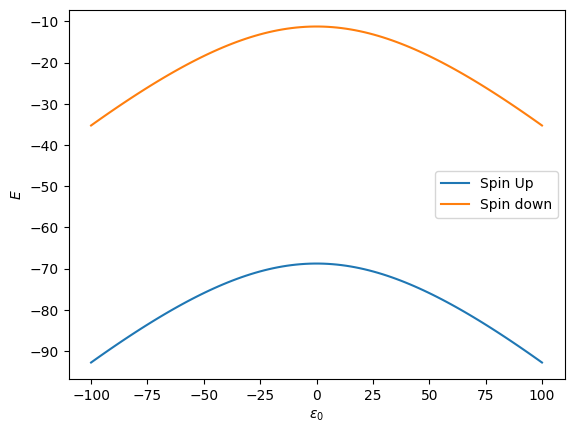

In [264]:
def K(tc, epsion, g, mu, B):
    Ez = g*mu*B
    return np.sqrt(tc**2+epsion**2/4)+ Ez/2, np.sqrt(tc**2+epsion**2/4) - Ez/2
K_, K_p = K(tc, epsilon, g, mu, B)
plt.plot(epsilon, -K_, label='Spin Up')
plt.plot(epsilon, -K_p, label='Spin down')
plt.xlabel(r'$\epsilon_0$')
plt.ylabel(r'$E $')
plt.legend()


# characterize qubits frequency under B = 0.1T as a function of $\epsilon$

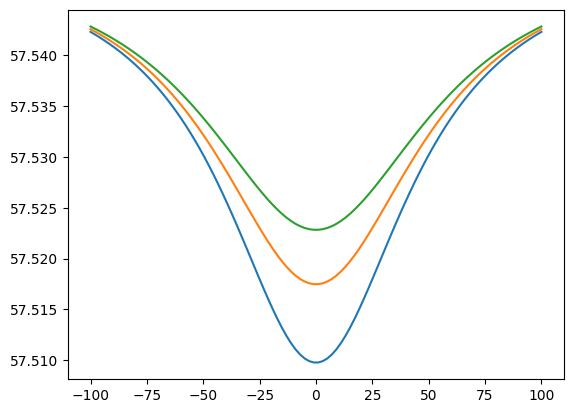

In [196]:
tc = 38
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency)
tc = 40
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency)
tc = 42
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency)

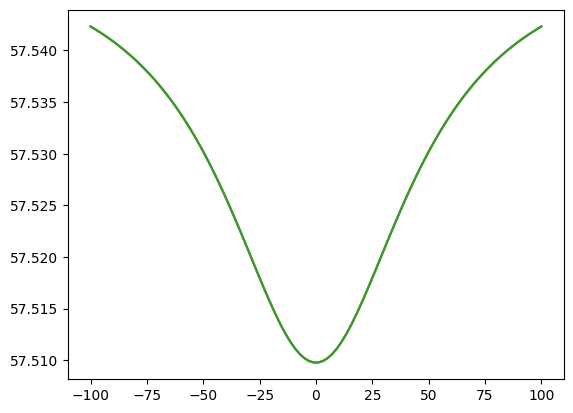

In [197]:
tc = 38
A = 0
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency)
A = 5
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency)
A = 8
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency)

## now consider the drive

In [233]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):
    
    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input
    
    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi
    gamma_ = K_-K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    print(drive_frequency)
    print(epsilon)
    print(w0)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)
    if resonance:
        return np.sqrt(rabi_0**2)

[[  0.           1.01010101   2.02020202 ...  97.97979798  98.98989899
  100.        ]
 [  0.           1.01010101   2.02020202 ...  97.97979798  98.98989899
  100.        ]
 [  0.           1.01010101   2.02020202 ...  97.97979798  98.98989899
  100.        ]
 ...
 [  0.           1.01010101   2.02020202 ...  97.97979798  98.98989899
  100.        ]
 [  0.           1.01010101   2.02020202 ...  97.97979798  98.98989899
  100.        ]
 [  0.           1.01010101   2.02020202 ...  97.97979798  98.98989899
  100.        ]]
[[-100.         -100.         -100.         ... -100.
  -100.         -100.        ]
 [ -97.97979798  -97.97979798  -97.97979798 ...  -97.97979798
   -97.97979798  -97.97979798]
 [ -95.95959596  -95.95959596  -95.95959596 ...  -95.95959596
   -95.95959596  -95.95959596]
 ...
 [  95.95959596   95.95959596   95.95959596 ...   95.95959596
    95.95959596   95.95959596]
 [  97.97979798   97.97979798   97.97979798 ...   97.97979798
    97.97979798   97.97979798]
 [ 100.   

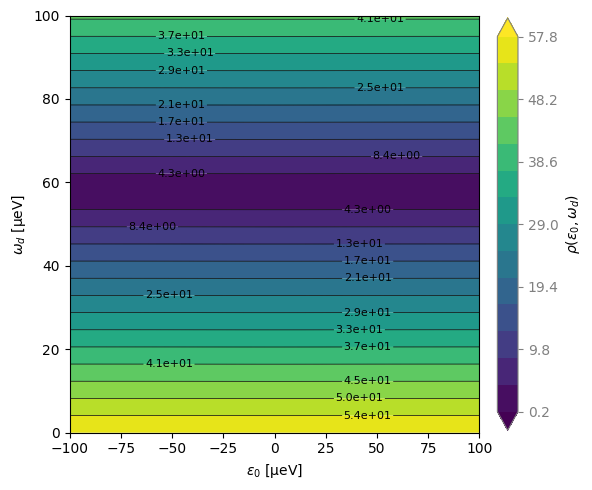

In [234]:
drive = np.linspace(0,100,100)
tc = 40
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
epsilon = np.linspace(-100,100,100)
#tc, drive = np.meshgrid(tc, drive, indexing='ij')
drive, epsilon = np.meshgrid(drive, epsilon)

plot(epsilon, drive, rabi_with_drive(8,drive, chi, tc,n, epsilon, g, mu, B, False))

[[57.79255087 57.79255087 57.79255087 ... 57.79255087 57.79255087
  57.79255087]
 [57.79230458 57.79230458 57.79230458 ... 57.79230458 57.79230458
  57.79230458]
 [57.79204775 57.79204775 57.79204775 ... 57.79204775 57.79204775
  57.79204775]
 ...
 [57.79204775 57.79204775 57.79204775 ... 57.79204775 57.79204775
  57.79204775]
 [57.79230458 57.79230458 57.79230458 ... 57.79230458 57.79230458
  57.79230458]
 [57.79255087 57.79255087 57.79255087 ... 57.79255087 57.79255087
  57.79255087]]
dddddd driuve [[ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 ...
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]
 [ 0.         0.1010101  0.2020202 ...  9.7979798  9.8989899 10.       ]]
[[-57.79255087 -57.79255087 -57.79255087 ... -57.7

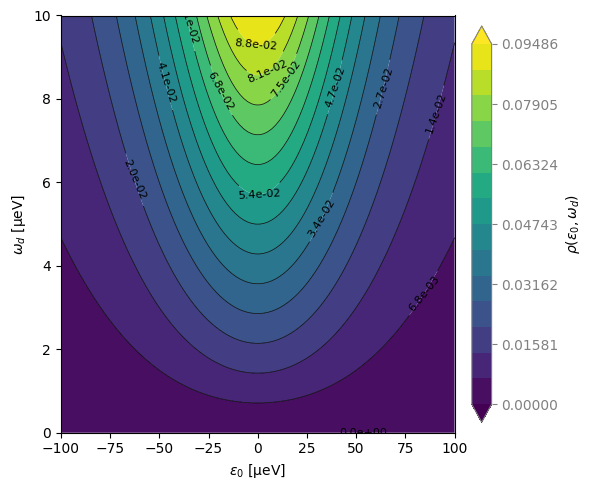

In [200]:
drive = np.linspace(0,10,100)
tc = 40
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
epsilon = np.linspace(-100,100,100)
#tc, drive = np.meshgrid(tc, drive, indexing='ij')
drive, epsilon = np.meshgrid(drive, epsilon)
plot(epsilon, drive, rabi_with_drive(drive,0, chi, tc,n, epsilon, g, mu, B))

[[57.79171868 57.79172734 57.791736   ... 57.79253467 57.79254277
  57.79255087]
 [57.79140163 57.79141109 57.79142054 ... 57.79228711 57.79229585
  57.79230458]
 [57.7910676  57.79107794 57.79108826 ... 57.79202891 57.79203834
  57.79204775]
 ...
 [57.7910676  57.79107794 57.79108826 ... 57.79202891 57.79203834
  57.79204775]
 [57.79140163 57.79141109 57.79142054 ... 57.79228711 57.79229585
  57.79230458]
 [57.79171868 57.79172734 57.791736   ... 57.79253467 57.79254277
  57.79255087]]
dddddd driuve 8
[[-57.79171868 -57.79172734 -57.791736   ... -57.79253467 -57.79254277
  -57.79255087]
 [-57.79140163 -57.79141109 -57.79142054 ... -57.79228711 -57.79229585
  -57.79230458]
 [-57.7910676  -57.79107794 -57.79108826 ... -57.79202891 -57.79203834
  -57.79204775]
 ...
 [-57.7910676  -57.79107794 -57.79108826 ... -57.79202891 -57.79203834
  -57.79204775]
 [-57.79140163 -57.79141109 -57.79142054 ... -57.79228711 -57.79229585
  -57.79230458]
 [-57.79171868 -57.79172734 -57.791736   ... -57.792

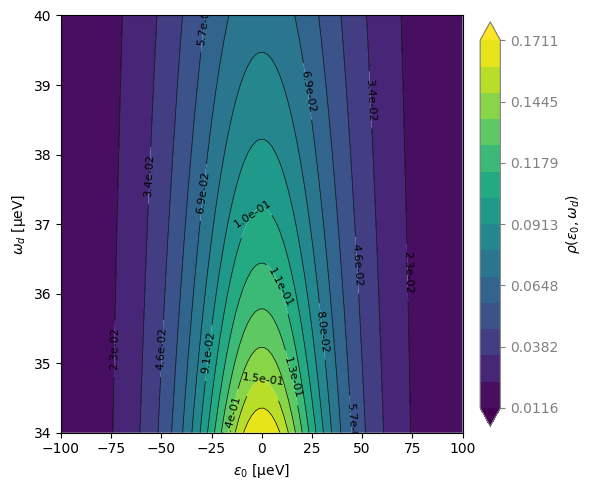

In [201]:
drive = 8
tc = np.linspace(34, 40, 100)
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
epsilon = np.linspace(-100,100,100)
#tc, drive = np.meshgrid(tc, drive, indexing='ij')
w0 = w0_func(chi, tc,n, epsilon, g, mu, B)
tc, epsilon = np.meshgrid(tc, epsilon)
rabi = rabi_with_drive(drive,0, chi, tc,n, epsilon, g, mu, B)
plot(epsilon, tc, rabi)

## derivative of rabi

In [202]:
drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[0],1,1)

[[57.79255087 57.79255087 57.79255087 ... 57.79255087 57.79255087
  57.79255087]
 [57.79230458 57.79230458 57.79230458 ... 57.79230458 57.79230458
  57.79230458]
 [57.79204775 57.79204775 57.79204775 ... 57.79204775 57.79204775
  57.79204775]
 ...
 [57.79204775 57.79204775 57.79204775 ... 57.79204775 57.79204775
  57.79204775]
 [57.79230458 57.79230458 57.79230458 ... 57.79230458 57.79230458
  57.79230458]
 [57.79255087 57.79255087 57.79255087 ... 57.79255087 57.79255087
  57.79255087]]
dddddd driuve 8
[[-0.39255087 -0.38649026 -0.38042965 ...  0.19532792  0.20138853
   0.20744913]
 [-0.39230458 -0.38624398 -0.38018337 ...  0.19557421  0.20163481
   0.20769542]
 [-0.39204775 -0.38598715 -0.37992654 ...  0.19583103  0.20189164
   0.20795225]
 ...
 [-0.39204775 -0.38598715 -0.37992654 ...  0.19583103  0.20189164
   0.20795225]
 [-0.39230458 -0.38624398 -0.38018337 ...  0.19557421  0.20163481
   0.20769542]
 [-0.39255087 -0.38649026 -0.38042965 ...  0.19532792  0.20138853
   0.20744913]]


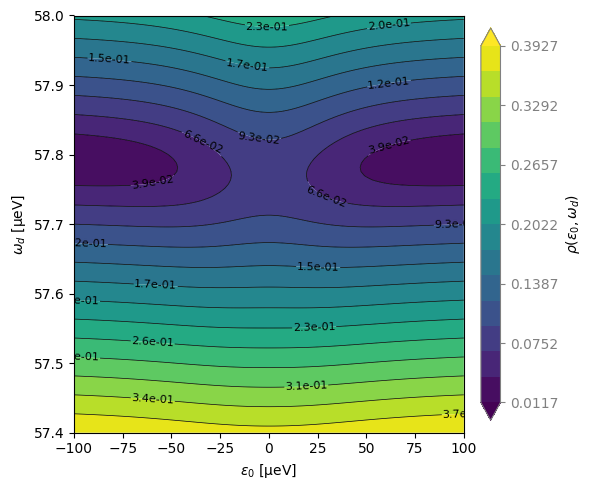

In [203]:
plot(epsilon, drive_freq, rabi)

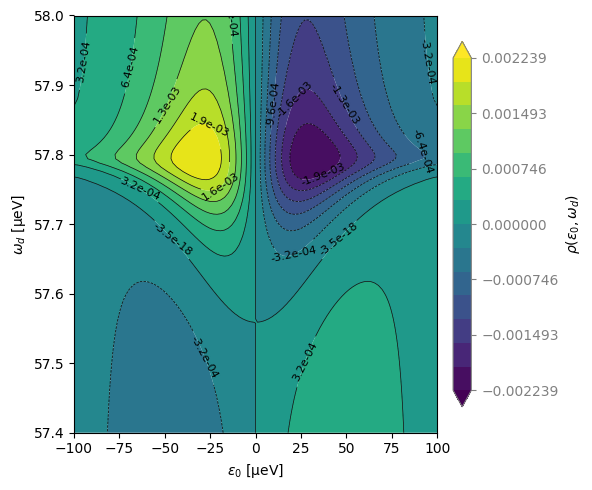

In [204]:
plot(epsilon, drive_freq, rabi_first_derivative[0])

In [205]:
drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[0],1,1)

[[57.79255087 57.79255087 57.79255087 ... 57.79255087 57.79255087
  57.79255087]
 [57.79230458 57.79230458 57.79230458 ... 57.79230458 57.79230458
  57.79230458]
 [57.79204775 57.79204775 57.79204775 ... 57.79204775 57.79204775
  57.79204775]
 ...
 [57.79204775 57.79204775 57.79204775 ... 57.79204775 57.79204775
  57.79204775]
 [57.79230458 57.79230458 57.79230458 ... 57.79230458 57.79230458
  57.79230458]
 [57.79255087 57.79255087 57.79255087 ... 57.79255087 57.79255087
  57.79255087]]
dddddd driuve 8
[[-0.39255087 -0.38649026 -0.38042965 ...  0.19532792  0.20138853
   0.20744913]
 [-0.39230458 -0.38624398 -0.38018337 ...  0.19557421  0.20163481
   0.20769542]
 [-0.39204775 -0.38598715 -0.37992654 ...  0.19583103  0.20189164
   0.20795225]
 ...
 [-0.39204775 -0.38598715 -0.37992654 ...  0.19583103  0.20189164
   0.20795225]
 [-0.39230458 -0.38624398 -0.38018337 ...  0.19557421  0.20163481
   0.20769542]
 [-0.39255087 -0.38649026 -0.38042965 ...  0.19532792  0.20138853
   0.20744913]]


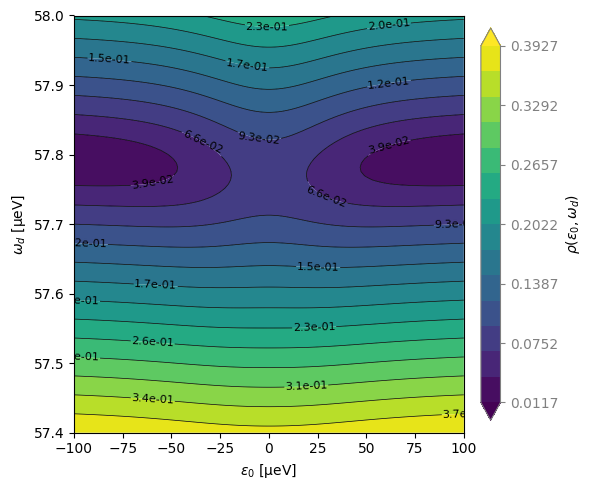

In [206]:

plot(epsilon, drive_freq, rabi)

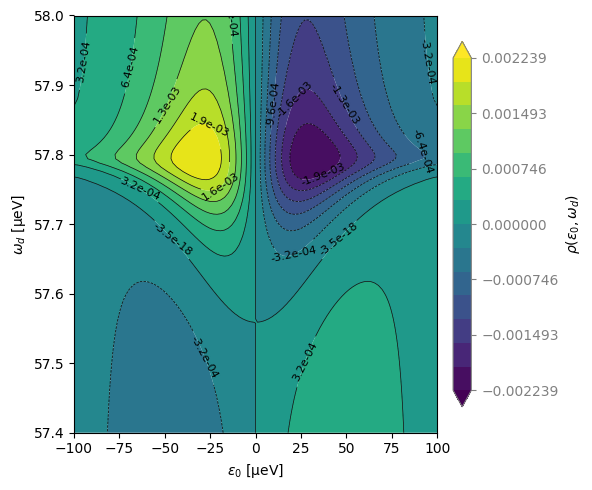

In [207]:
plot(epsilon, drive_freq, rabi_first_derivative[0])

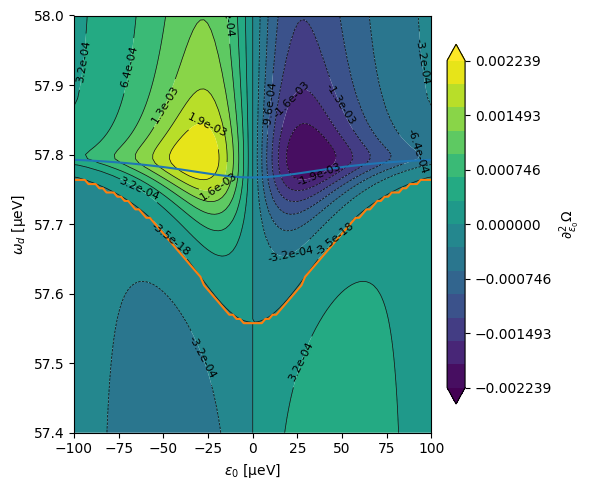

In [208]:
w0 = w0_func(chi, tc,n, epsilon[:,0], g, mu, B)
##find the zero point of first derivative
wd = []

for i in range(len(rabi_first_derivative[0])):
    temp_index = np.where(rabi_first_derivative[0][i][:-1] * rabi_first_derivative[0][i][1:]<0)[0]
    wd.append(drive_freq[0][temp_index])
plot_overlay(epsilon, drive_freq, rabi_first_derivative[0],epsilon[:,0], w0, wd)


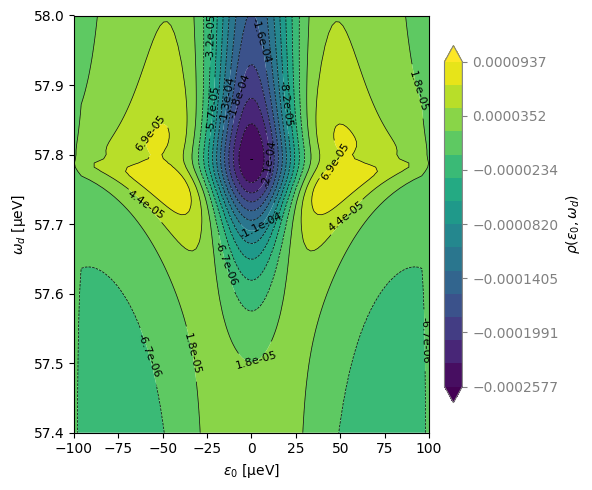

In [209]:
plot(epsilon, drive_freq, rabi_second_derivative[0])

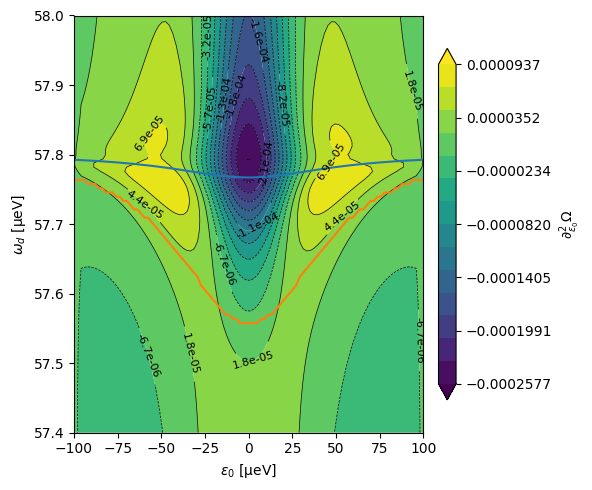

In [212]:
plot_overlay(epsilon, drive_freq, rabi_second_derivative[0],epsilon[:,0], w0, wd, levels = 15)

In [213]:
drive_freq = np.linspace(20, 28, 100)
epsilon = np.linspace(-10,5,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[0],1,1)

[[57.76812273 57.76812273 57.76812273 ... 57.76812273 57.76812273
  57.76812273]
 [57.76809203 57.76809203 57.76809203 ... 57.76809203 57.76809203
  57.76809203]
 [57.76806174 57.76806174 57.76806174 ... 57.76806174 57.76806174
  57.76806174]
 ...
 [57.76730765 57.76730765 57.76730765 ... 57.76730765 57.76730765
  57.76730765]
 [57.76732315 57.76732315 57.76732315 ... 57.76732315 57.76732315
  57.76732315]
 [57.76733913 57.76733913 57.76733913 ... 57.76733913 57.76733913
  57.76733913]]
dddddd driuve 8
[[-37.76812273 -37.68731465 -37.60650657 ... -29.92973889 -29.84893081
  -29.76812273]
 [-37.76809203 -37.68728395 -37.60647587 ... -29.92970819 -29.84890011
  -29.76809203]
 [-37.76806174 -37.68725365 -37.60644557 ... -29.9296779  -29.84886982
  -29.76806174]
 ...
 [-37.76730765 -37.68649957 -37.60569149 ... -29.92892381 -29.84811573
  -29.76730765]
 [-37.76732315 -37.68651507 -37.60570699 ... -29.92893931 -29.84813123
  -29.76732315]
 [-37.76733913 -37.68653105 -37.60572297 ... -29.928

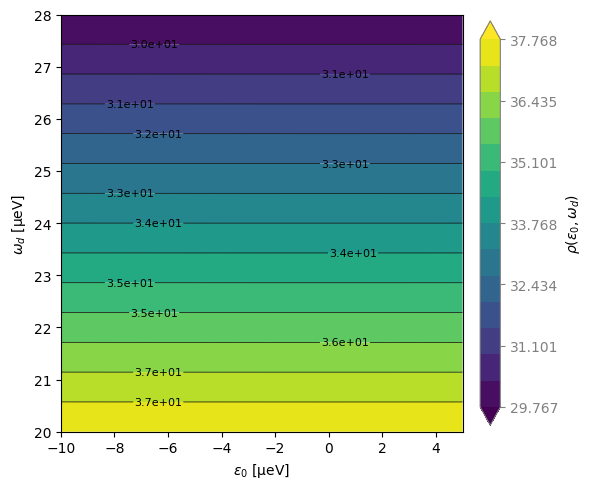

In [214]:
plot(epsilon, drive_freq, rabi)

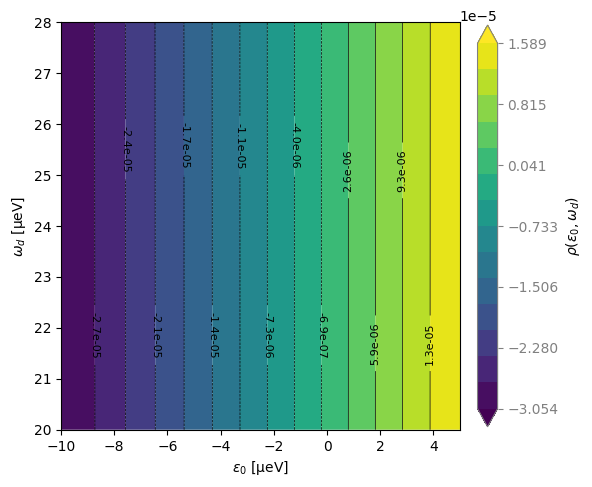

In [215]:
plot(epsilon, drive_freq, rabi_first_derivative[0])

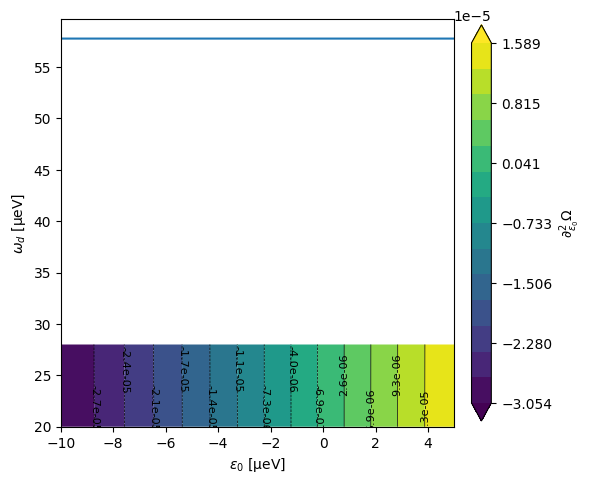

In [217]:
w0 = w0_func(chi, tc,n, epsilon[:,0], g, mu, B)
##find the zero point of first derivative
wd = []

for i in range(len(rabi_first_derivative[0])):
    temp_index = np.where(rabi_first_derivative[0][i][:-1] * rabi_first_derivative[0][i][1:]<0)[0]
    wd.append(drive_freq[0][temp_index])
plot_overlay(epsilon, drive_freq, rabi_first_derivative[0],epsilon[:,0], wd, w0)


## ok let's introduce the bloch vector

In [240]:
from matplotlib.colors import LogNorm

def plot(X, Y, Z,
         cmap='viridis',
         levels=15,
         figsize=(6, 5),
         xlabel=r'$\epsilon_0\ [\mathrm{\mu eV}]$',
         ylabel=r'$\omega_d\ [\mathrm{\mu eV}]$',
         cbar_label=None,
         log_scale=True,
         overlay_1d=None,
         overlay_1d_2=None):
    """
    Unified 2D density or field plot with optional log scaling and overlays.

    Parameters:
    - X, Y, Z: grid and field/density values
    - cmap: colormap name
    - levels: number of contour levels
    - figsize: figure size tuple
    - xlabel, ylabel: axis labels (LaTeX strings)
    - cbar_label: custom colorbar label (defaults based on scale)
    - log_scale: if True, applies log scale (LogNorm) to the field/density
    - overlay_1d: tuple (x_1d, Z_1d) for 1D overlay line plot
    - overlay_1d_2: tuple (x_1d, Z_1d_2) for second 1D overlay
    """
    # Prepare data for plotting
    if log_scale:
        # Replace non-positive values with nan for log scale
        Z_plot = np.where(Z <= 0, np.nan, Z)
        norm = LogNorm(vmin=np.nanmin(Z_plot), vmax=np.nanmax(Z_plot))
        levels_array = np.logspace(
            np.log10(np.nanmin(Z_plot)),
            np.log10(np.nanmax(Z_plot)),
            levels
        )
        default_label = r'$\log_{10}\rho(\epsilon_0, \omega_d)$'
    else:
        Z_plot = Z
        norm = None
        levels_array = np.linspace(Z.min(), Z.max(), levels)
        default_label = r'$\rho(\epsilon_0, \omega_d)$'

    # Determine colorbar label
    if cbar_label is None:
        cbar_label = default_label

    # Create plot with khaki background
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')
    ax.set_facecolor('white')

    # Filled contours
    cf = ax.contourf(
        X, Y, Z_plot,
        levels=levels_array,
        norm=norm,
        cmap=cmap,
        extend='both',
        antialiased=True
    )
    # Contour lines
    cs = ax.contour(
        X, Y, Z_plot,
        levels=levels_array,
        norm=norm,
        colors='k',
        linewidths=0.5
    )
    ax.clabel(cs, fmt='%.1e' if log_scale else '%.2f', fontsize=8)

    # Optional 1D overlays
    if overlay_1d is not None:
        x1, z1 = overlay_1d
        ax.plot(x1, z1)
    if overlay_1d_2 is not None:
        x2, z2 = overlay_1d_2
        ax.plot(x2, z2)

    # Labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Colorbar
    cbar = fig.colorbar(
        cf, ax=ax,
        orientation='vertical',
        fraction=0.046, pad=0.04,
        ticks=levels_array,
        norm=norm
    )
    cbar.set_label(cbar_label)
    cbar.outline.set_edgecolor('gray')
    cbar.ax.yaxis.set_tick_params(color='gray')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='gray')

    plt.tight_layout()
    plt.show()


In [249]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):
    
    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input
    
    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi
    
    gamma_ = K_-K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)
    if resonance:
        return np.sqrt(rabi_0**2)
    
def evolution(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, noise):
    rabi_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion+noise, g, mu, B, False)
    rabi_resonance = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsion+noise, g, mu, B)
    rabi_off_resonance_noiseless = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, False)
    nx = rabi_resonance/rabi_off_resonance
    w0 = w0_func(chi_input, tc,n, epsion+noise, g, mu, B)
    detune = drive_frequency - w0
    nz = detune/rabi_off_resonance
    t = np.pi/rabi_off_resonance_noiseless
    plot(epsion, drive_frequency, detune)
    element1 = np.cos(rabi_off_resonance*t/2)-1j*nz*np.sin(rabi_off_resonance*t/2)
    element2 = -1j*nx*np.sin(rabi_off_resonance*t/2)
    element3 = -1j*nx*np.sin(rabi_off_resonance*t/2)
    element4 = np.cos(rabi_off_resonance*t/2)+1j*nz*np.sin(rabi_off_resonance*t/2)
    U = np.array([[element1, element2],[element3, element4]])
    return U
    
def evolution_T(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, noise):
    rabi_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion+noise, g, mu, B, False)
    rabi_resonance = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsion+noise, g, mu, B)
    rabi_off_resonance_noiseless = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, False)
    nx = rabi_resonance/rabi_off_resonance
    w0 = w0_func(chi_input, tc,n, epsion+noise, g, mu, B)
    detune = drive_frequency - w0
    nz = detune/rabi_off_resonance
    t = np.pi/rabi_off_resonance_noiseless
    
    element1 = np.cos(rabi_off_resonance*t/2)+1j*nz*np.sin(rabi_off_resonance*t/2)
    element2 = 1j*nx*np.sin(rabi_off_resonance*t/2)
    element3 = 1j*nx*np.sin(rabi_off_resonance*t/2)
    element4 = np.cos(rabi_off_resonance*t/2)-1j*nz*np.sin(rabi_off_resonance*t/2)
    U = np.array([[element1, element2],[element3, element4]])
    return U 

def mat_mul(a, b):
    element1 = a[0][0]*b[0][0]+a[0][1]*b[1][0]
    element2 = a[0][0]*b[0][1]+a[0][1]*b[1][1]
    element3 = a[1][0]*b[0][0]+a[1][1]*b[1][0]
    element4 = a[1][0]*b[0][1]+a[1][1]*b[1][1]
    return np.array([[element1, element2],[element3, element4]])



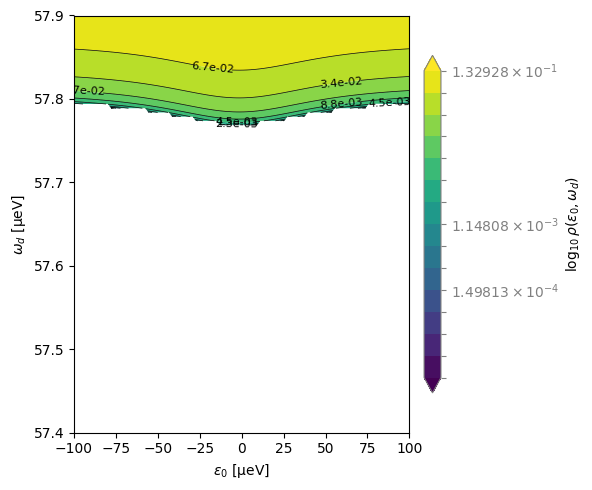

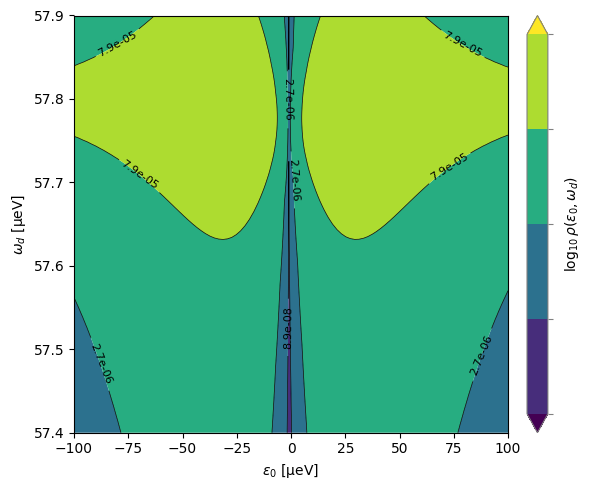

In [250]:
drive_freq = np.linspace(57.4, 57.9, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
U_T = evolution_T(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, 0)
U_ = evolution(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, 1.5)
final_U = mat_mul(U_T, U_)
trace = final_U[0][0] + final_U[1][1]
F = 1-(2+abs(trace)**2)/(2*3)
plot(epsilon, drive_freq, F,levels = 5)

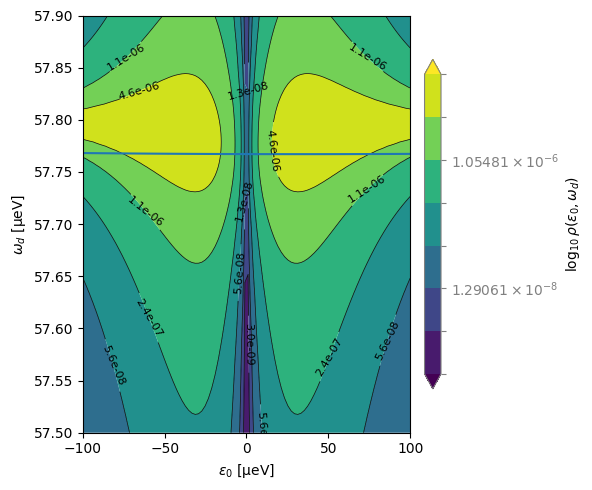

In [246]:
def monte_carlo_avg(epsilon0, sigma, Nsamples, 
                    drive, drive_frequency, chi_input, tc, n, g, mu, B,
                    compute_U):
    Us = []
    # draw all noise samples at once
    deltas = np.random.normal(loc=0.0, scale=sigma, size=Nsamples)
    for δε in deltas:
        U = compute_U(drive, drive_frequency, chi_input,
                      tc, n, epsilon0, g, mu, B, δε)
        Us.append(U)
    # now average matrix element‑wise
    Ustack = np.stack(Us, axis=0)    # shape (Nsamples, 2, 2)
    Uavg = Ustack.mean(axis=0) 
    return Uavg

drive_freq = np.linspace(57.5, 57.9, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
U_T = evolution_T(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, 0)
U_ = monte_carlo_avg(epsilon, 0.15, 100, 
                    drive, drive_freq, chi, tc, n, g, mu, B,
                    evolution)
final_U = mat_mul(U_T, U_)
trace = final_U[0][0] + final_U[1][1]
F = 1-(2+np.abs(trace)**2)/(2*3)
plot(epsilon, drive_freq, F,levels = 8, overlay_1d=[epsilon[:,0], w0], overlay_1d_2 = [epsilon[:,0], wd], log_scale=True)

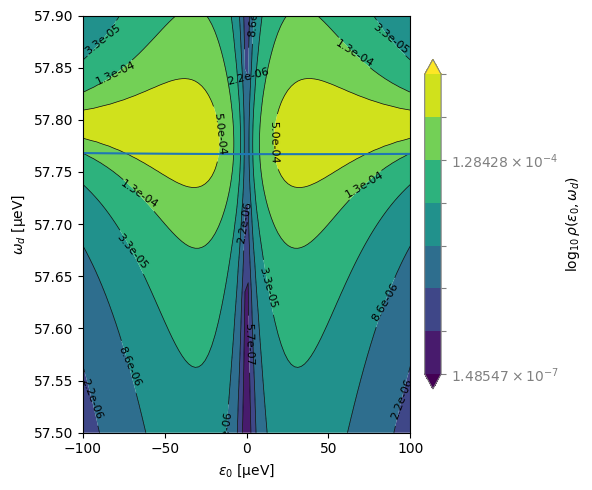

In [176]:
def monte_carlo_avg(epsilon0, sigma, Nsamples, 
                    drive, drive_frequency, chi_input, tc, n, g, mu, B):
    F_average = []
    # draw all noise samples at once
    deltas = np.random.normal(loc=0.0, scale=sigma, size=Nsamples)
    for delta in deltas:
        U_T = evolution_T(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, 0)
        U_ = evolution(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, delta)
        final_U = mat_mul(U_T, U_)
        trace = final_U[0][0] + final_U[1][1]
        F = 1-(2+np.abs(trace)**2)/(2*3)
        F_average.append(F)
    # now average matrix element‑wise
    F = np.stack(F_average, axis=0)    # shape (Nsamples, 2, 2)
    F_mean = F.mean(axis=0) 
    
    
    return F_mean

drive_freq = np.linspace(57.5, 57.9, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1

F = monte_carlo_avg(epsilon, 1.5, 100, 
                    drive, drive_freq, chi, tc, n$, g, mu, B)
plot(epsilon, drive_freq, F,levels = 8, overlay_1d=[epsilon[:,0], w0], overlay_1d_2 = [epsilon[:,0], wd], log_scale=True)

In [177]:
drive_freq = np.linspace(20, 38, 100)
drive_freq_ = np.linspace(20, 38, 100)
epsilon = np.linspace(-100,100,100)
epsilon_ = epsilon + 1.15
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
drive_freq_, epsilon_ = np.meshgrid(drive_freq_, epsilon_)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
U_T = evolution_T(drive,drive_freq, chi, tc,n, epsilon, g, mu, B)
U_ = evolution(drive,drive_freq_, chi, tc,n, epsilon_, g, mu, B)
final_U = mat_mul(U_T, U_)
trace = final_U[0][0] + final_U[1][1]
F = 1-(2+np.abs(trace)**2)/(2*3)
plot(epsilon, drive_freq, F)

TypeError: evolution_T() missing 1 required positional argument: 'noise'

### error check

In [170]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):
    
    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input
    
    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi
    
    gamma_ = K_ - K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)
    if resonance:
        return np.sqrt(rabi_0**2)
    
def evolution(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, noise):
    rabi_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion+noise, g, mu, B, False)
    rabi_resonance = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsion+noise, g, mu, B)
    rabi_off_resonance_noiseless = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, False)
    nx = rabi_resonance/rabi_off_resonance
    w0 = w0_func(chi_input, tc,n, epsion+noise, g, mu, B)
    detune = drive_frequency - w0
    nz = detune/rabi_resonance
    t = np.pi/rabi_off_resonance_noiseless
    
    element1 = np.cos(rabi_off_resonance*t/2)-1j*nz*np.sin(rabi_off_resonance*t/2)
    element2 = -1j*nx*np.sin(rabi_off_resonance*t/2)
    element3 = -1j*nx*np.sin(rabi_off_resonance*t/2)
    element4 = np.cos(rabi_off_resonance*t/2)+1j*nz*np.sin(rabi_off_resonance*t/2)
    U = np.array([[element1, element2],[element3, element4]])
    return U
    
def evolution_T(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, noise):
    rabi_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion+noise, g, mu, B, False)
    rabi_resonance = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsion+noise, g, mu, B)
    rabi_off_resonance_noiseless = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, False)
    nx = rabi_resonance/rabi_off_resonance
    w0 = w0_func(chi_input, tc,n, epsion+noise, g, mu, B)
    detune = drive_frequency - w0
    nz = detune/rabi_resonance
    t = np.pi/rabi_off_resonance_noiseless
    
    element1 = np.cos(rabi_off_resonance*t/2)+1j*nz*np.sin(rabi_off_resonance*t/2)
    element2 = 1j*nx*np.sin(rabi_off_resonance*t/2)
    element3 = 1j*nx*np.sin(rabi_off_resonance*t/2)
    element4 = np.cos(rabi_off_resonance*t/2)-1j*nz*np.sin(rabi_off_resonance*t/2)
    U = np.array([[element1, element2],[element3, element4]])
    return U 

def mat_mul(a, b):
    element1 = a[0][0]*b[0][0]+a[0][1]*b[1][0]
    element2 = a[0][0]*b[0][1]+a[0][1]*b[1][1]
    element3 = a[1][0]*b[0][0]+a[1][1]*b[1][0]
    element4 = a[1][0]*b[0][1]+a[1][1]*b[1][1]
    return np.array([[element1, element2],[element3, element4]])



[[[[ 6.12323400e-17-3.38483983e+01j  6.12323400e-17-3.33258118e+01j
     6.12323400e-17-3.28032252e+01j ...  6.12323400e-17+1.68424983e+01j
     6.12323400e-17+1.73650849e+01j  6.12323400e-17+1.78876715e+01j]
   [ 2.83276945e-16-3.24106100e+01j  6.12323400e-17-3.19099074e+01j
     6.12323400e-17-3.14092047e+01j ... -1.60812265e-16+1.61575459e+01j
     6.12323400e-17+1.66582485e+01j  6.12323400e-17+1.71589511e+01j]
   [ 6.12323400e-17-3.10217563e+01j  6.12323400e-17-3.05421957e+01j
     6.12323400e-17-3.00626352e+01j ...  2.83276945e-16+1.54956189e+01j
     6.12323400e-17+1.59751795e+01j  6.12323400e-17+1.64547400e+01j]
   ...
   [ 6.12323400e-17-3.10217563e+01j  6.12323400e-17-3.05421957e+01j
     6.12323400e-17-3.00626352e+01j ...  2.83276945e-16+1.54956189e+01j
     6.12323400e-17+1.59751795e+01j  6.12323400e-17+1.64547400e+01j]
   [ 2.83276945e-16-3.24106100e+01j  6.12323400e-17-3.19099074e+01j
     6.12323400e-17-3.14092047e+01j ... -1.60812265e-16+1.61575459e+01j
     6.12323400e-

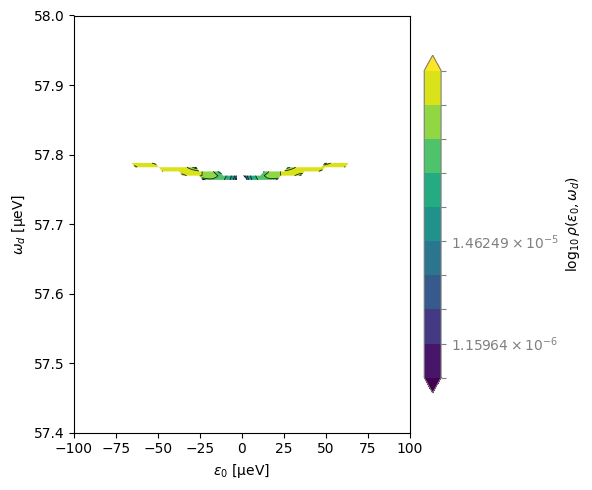

In [171]:
drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
U_T = evolution_T(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, 0)
print(U_T)
U_ = evolution(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, 1)
final_U = mat_mul(U_T, U_)
trace = final_U[0][0] + final_U[1][1]
F = 1-(2+abs(trace)**2)/(2*3)
plot(epsilon, drive_freq, F,levels = 10)